# Exploring the Generic 2D Oscillator Model

## Overview

*(initially assembled for McIntosh Lab theory group meeting in August 2015)*

## Notebook Setup

Define some variables

In [46]:
tvb_lib_folder = '../../../../libraries_of_others/github/tvb-library'
tvb_dat_folder = '../../../../libraries_of_others/github/tvb-data'

eg_rois = ['lV1', 'rV1', 'lA1', 'rA1']
second_y_rois = ['lV1', 'rA1']

In [47]:
tvb_lib_folder = os.path.abspath(tvb_lib_folder)
tvb_dat_folder = os.path.abspath(tvb_dat_folder)

Importage

In [441]:
import os,sys,glob,numpy as np,pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

sys.path+=[tvb_lib_folder,tvb_dat_folder]
from tvb.simulator.lab import *

from mne.io import RawArray
from mne import create_info

## Background: Dynamical Systems

- phase planes
- null clines

## The G2dO Model

$\dot{V} = d \, \tau (-f V^3 + e V^2 + g V + \alpha W + \gamma I)$  
$\dot{W} = \dfrac{d}{\tau}\,\,(c V^2 + b V - \beta W + a)$

Parameter table for the Generic 2D Oscillator model (generated automatically from traits class structure)

In [442]:
G = models.Generic2dOscillator

kks = ['description', 'default', 'minValue', 'maxValue']
thing = []
for k in G.trait:
 intf = getattr(G,k).interface
 thingy = [k]
 for kk in kks:
  if kk in intf: 
   thingy.append(intf[kk])
 thing.append(thingy)
            
df = pd.DataFrame(thing, columns = ['parameter'] + kks)
df.set_index('parameter', inplace=True)

myparams = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'alpha',
            'beta', 'gamma', 'I', 'tau']

df.ix[myparams]#.to_pickle(f)

,description,default,minValue,maxValue
parameter,,,,
a,Vertical shift of the configurable nullcline,[-2.0],-5.0000,5.0
b,Linear slope of the configurable nullcline,[-10.0],-20.0000,15.0
c,Parabolic term of the configurable nullcline,[0.0],-10.0000,10.0
d,Temporal scale factor. Warning: do not use it ...,[0.02],0.0001,1.0
e,Coefficient of the quadratic term of the cubic...,[3.0],-5.0000,5.0
f,Coefficient of the cubic term of the cubic nul...,[1.0],-5.0000,5.0
g,Coefficient of the linear term of the cubic nu...,[0.0],-5.0000,5.0
alpha,Constant parameter to scale the rate of feedba...,[1.0],-5.0000,5.0
beta,Constant parameter to scale the rate of feedba...,[1.0],-5.0000,5.0


## Param Tables


G2dO Configuration 1 - Excitable

    +---------------------------+
    |  Table 1                  |
    +--------------+------------+
    |  EXCITABLE CONFIGURATION  |
    +--------------+------------+
    |Parameter     |  Value     |
    +==============+============+
    | a            |     -2.0   |
    +--------------+------------+
    | b            |    -10.0   |
    +--------------+------------+
    | c            |      0.0   |
    +--------------+------------+
    | d            |      0.02  |
    +--------------+------------+
    | I            |      0.0   |
    +--------------+------------+
    |  limit cycle if a is 2.0  |
    +---------------------------+



G2dO Configuration 2 - Bistable 


    +---------------------------+
    |   Table 2                 |
    +--------------+------------+
    |   BISTABLE CONFIGURATION  |
    +--------------+------------+
    |Parameter     |  Value     |
    +==============+============+
    | a            |      1.0   |
    +--------------+------------+
    | b            |      0.0   |
    +--------------+------------+
    | c            |     -5.0   |
    +--------------+------------+
    | d            |      0.02  |
    +--------------+------------+
    | I            |      0.0   |
    +--------------+------------+
    | monostable regime:        |
    | fixed point if Iext=-2.0  |
    | limit cycle if Iext=-1.0  |
    +---------------------------+
    
    

G2dO Configuration 3 - Excitable (Morris-Lecar-like)

    +---------------------------+
    |  Table 3                  |
    +--------------+------------+
    |  EXCITABLE CONFIGURATION  |
    +--------------+------------+
    |  (similar to Morris-Lecar)|
    +--------------+------------+
    |Parameter     |  Value     |
    +==============+============+
    | a            |      0.5   |
    +--------------+------------+
    | b            |      0.6   |
    +--------------+------------+
    | c            |     -4.0   |
    +--------------+------------+
    | d            |      0.02  |
    +--------------+------------+
    | I            |      0.0   |
    +--------------+------------+
    | excitable regime if b=0.6 |
    | oscillatory if b=0.4      |
    +---------------------------+

G2dO Configuration 4 - 10 Hz Peak

    +---------------------------+
    |  Table 4                  |
    +--------------+------------+
    |  GhoshetAl,  2008         |
    |  KnocketAl,  2009         |
    +--------------+------------+
    |Parameter     |  Value     |
    +==============+============+
    | a            |    1.05    |
    +--------------+------------+
    | b            |   -1.00    |
    +--------------+------------+
    | c            |    0.0     |
    +--------------+------------+
    | d            |    0.1     |
    +--------------+------------+
    | I            |    0.0     |
    +--------------+------------+
    | alpha        |    1.0     |
    +--------------+------------+
    | beta         |    0.2     |
    +--------------+------------+
    | gamma        |    -1.0    |
    +--------------+------------+
    | e            |    0.0     |
    +--------------+------------+
    | g            |    1.0     |
    +--------------+------------+
    | f            |    1/3     |
    +--------------+------------+
    | tau          |    1.25    |
    +--------------+------------+
    |                           |
    |  frequency peak at 10Hz   |
    |                           |
    +---------------------------+

G2dO Configuration 5 - 10 Hz Freq Peak

    +---------------------------+
    |  Table 5                  |
    +--------------+------------+
    |  SanzLeonetAl  2013       |
    +--------------+------------+
    |Parameter     |  Value     |
    +==============+============+
    | a            |    - 0.5   |
    +--------------+------------+
    | b            |    -10.0   |
    +--------------+------------+
    | c            |      0.0   |
    +--------------+------------+
    | d            |      0.02  |
    +--------------+------------+
    | I            |      0.0   |
    +--------------+------------+
    |                           |
    |  intrinsic frequency is   |
    |  approx 10 Hz             |
    |                           |
    +---------------------------+

    NOTE: This regime, if I = 2.1, is called subthreshold regime.
    Unstable oscillations appear through a subcritical Hopf bifurcation.

Simple run simulation function

In [443]:
def run_smallsim(g2do_params,n_step=50000,dt=0.1):
    mod = models.Generic2dOscillator(**g2do_params)
    t,y = mod.stationary_trajectory(n_step=n_step,dt=dt)
    y = np.squeeze(y)
    df_VW = pd.DataFrame(y,index=t,columns=['V', 'W'])
    df_VW.columns.names = ['svar']
    df_VW.index.names = ['t']    

    info = create_info(ch_names = ['V', 'W'], ch_types = ['eeg', 'eeg'], sfreq=100./dt)
    mne_VW = RawArray(info=info,data=y.T)
    

    return df_VW,mne_VW

Specify regimes

In [444]:
regime_1a = {'a': -2.0, 'b': -10.0, 'c': 0.0, 'd': 0.02, 'I': 0.0}
regime_1b = {'a': 2.0, 'b': -10.0, 'c': 0.0, 'd': 0.02, 'I': 0.0}

regime_2a = {'a': 1.0, 'b': 0.0, 'c': -5.0, 'd': 0.02, 'I': 0.0}
regime_2b = {'a': 1.0, 'b': 0.0, 'c': -5.0, 'd': 0.02, 'I': -2.0}
regime_2c = {'a': 1.0, 'b': 0.0, 'c': -5.0, 'd': 0.02, 'I': -1.0}

regime_3a = {'a': 0.5, 'b': 0.6, 'c': -4.0, 'd': 0.02, 'I': 0.0}
regime_3b = {'a': 0.5, 'b': 0.4, 'c': -4.0, 'd': 0.02, 'I': 0.0}

regime_4 = {'a': 1.05, 'b': -1.00, 'c': 0.0, 'd': 0.1, 
            'I': 0.0, 'alpha': 1.0, 'beta': 0.2, 'gamma': -1.0, 
            'e': 0.0, 'g': 1.0, 'f': 1/3, 'tau': 1.25}

regime_5a = {'a': -0.5, 'b': -10.0, 'c': 0.0, 'd': 0.02, 'I': 0.0}
regime_5b = {'a': -0.5, 'b': -10.0, 'c': 0.0, 'd': 0.02, 'I': 2.1}

## Run sims

In [411]:
%%time

VW_1a,mne_1a  = run_smallsim(regime_1a,n_step=10000,dt=0.5)
VW_1b,mne_1b  = run_smallsim(regime_1b,n_step=10000,dt=0.5)

VW_2a,mne_2a  = run_smallsim(regime_2a,n_step=10000,dt=0.5)
VW_2b,mne_2b  = run_smallsim(regime_2b,n_step=10000,dt=0.5)

VW_3a,mne_3a  = run_smallsim(regime_3a,n_step=10000,dt=0.5)
VW_3b,mne_3b  = run_smallsim(regime_3b,n_step=10000,dt=0.5)

VW_4,mne_4  = run_smallsim(regime_4)

VW_5a,mne_5a  = run_smallsim(regime_5a,n_step=10000,dt=0.5)
VW_5b,mne_5b  = run_smallsim(regime_5b,n_step=10000,dt=0.5)

Creating RawArray with float64 data, n_channels=2, n_times=1001
    Range : 0 ... 1000 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=1001
    Range : 0 ... 1000 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=1001
    Range : 0 ... 1000 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=1001
    Range : 0 ... 1000 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=1001
    Range : 0 ... 1000 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=1001
    Range : 0 ... 1000 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=5001
    Range : 0 ... 5000 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=1001
    Range : 0 ... 1000 =      0.000 ...     5.000 secs

Effective window size : 5.005 (s)
Effective window size : 5.005 (s)


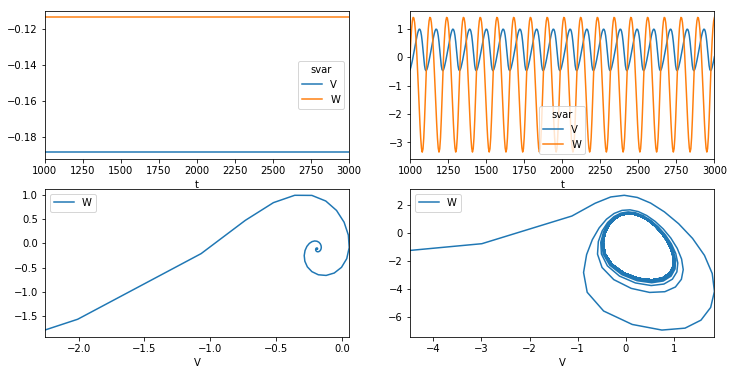

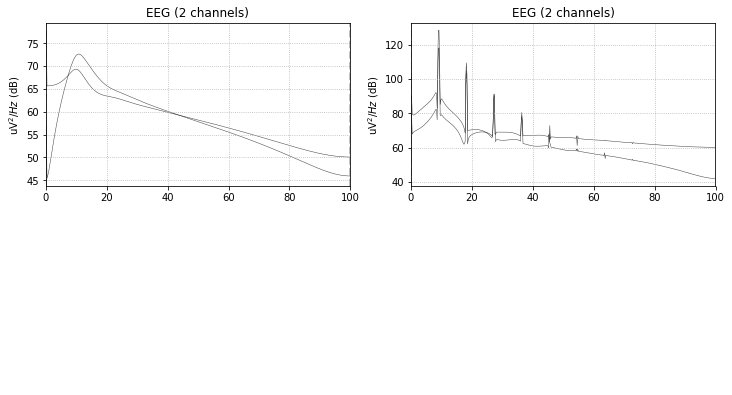

In [412]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,6))

VW_1a.loc[1000:3000].plot(ax=ax[0][0])
VW_1a.plot(x='V', y='W',ax=ax[1][0])#,xlim=[-5,5], ylim=[-5,5])

VW_1b.loc[1000:3000].plot(ax=ax[0][1])
VW_1b.plot(x='V', y='W',ax=ax[1][1])#,xlim=[-5,5], ylim=[-5,5])

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12,3))
mne_1a.plot_psd(ax=ax[0],show=False);
mne_1b.plot_psd(ax=ax[1],show=False);

Effective window size : 5.005 (s)
Effective window size : 5.005 (s)


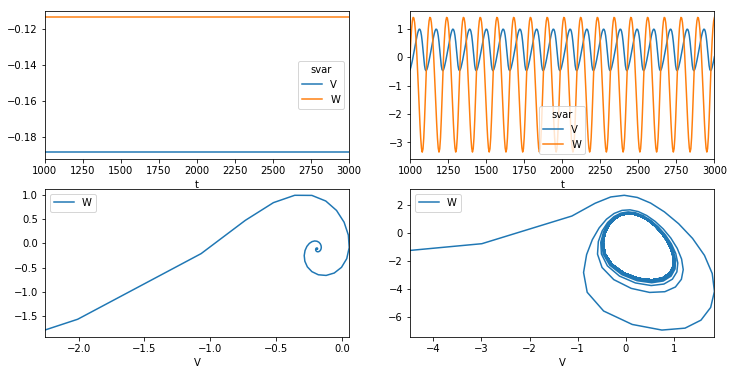

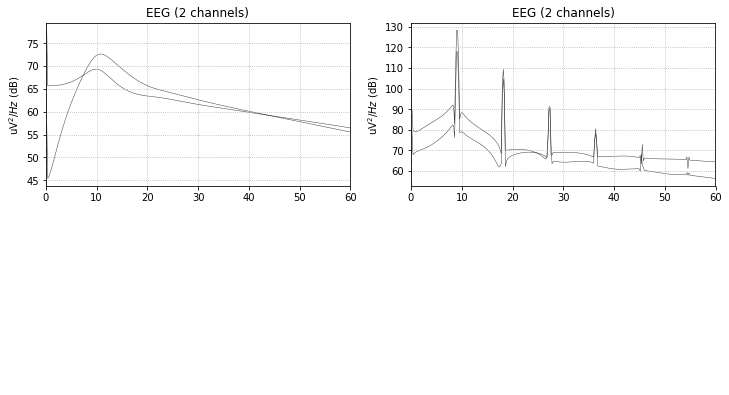

In [427]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,6))

VW_1a.loc[1000:3000].plot(ax=ax[0][0])
VW_1a.plot(x='V', y='W',ax=ax[1][0])#,xlim=[-5,5], ylim=[-5,5])

VW_1b.loc[1000:3000].plot(ax=ax[0][1])
VW_1b.plot(x='V', y='W',ax=ax[1][1])#,xlim=[-5,5], ylim=[-5,5])

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12,3))
_ = mne_1a.plot_psd(ax=ax[0],show=False,fmin=0.,fmax=60.);
_ = mne_1b.plot_psd(ax=ax[1],show=False,fmin=0.,fmax=60.)

Effective window size : 5.005 (s)
Effective window size : 5.005 (s)


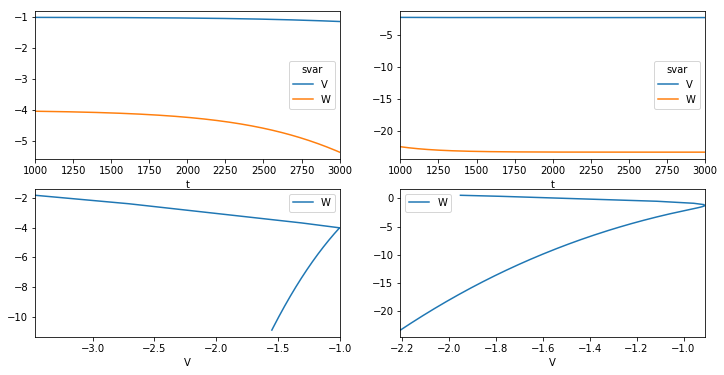

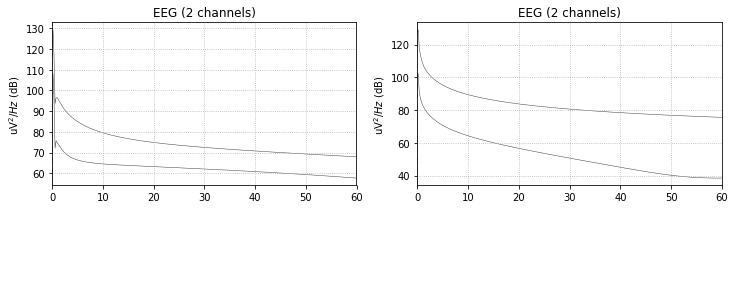

In [426]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,6))

VW_2a.loc[1000:3000].plot(ax=ax[0][0])
VW_2a.plot(x='V', y='W',ax=ax[1][0])#,xlim=[-5,5], ylim=[-5,5])

VW_2b.loc[1000:3000].plot(ax=ax[0][1])
VW_2b.plot(x='V', y='W',ax=ax[1][1])#,xlim=[-5,5], ylim=[-5,5])

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12,3))
_ = mne_2a.plot_psd(ax=ax[0],show=False,fmin=0.,fmax=60.);
_ = mne_2b.plot_psd(ax=ax[1],show=False,fmin=0.,fmax=60.)

Effective window size : 5.005 (s)
Effective window size : 5.005 (s)


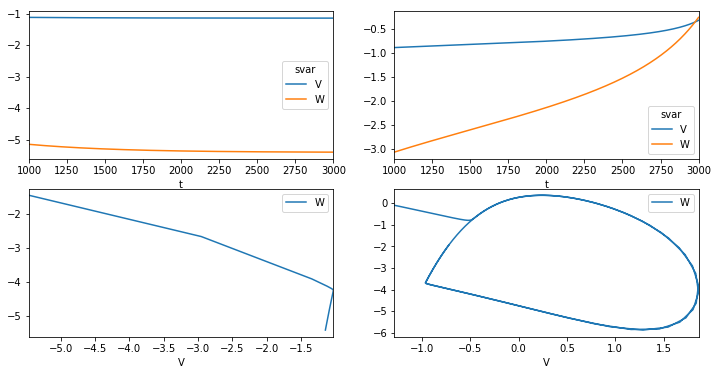

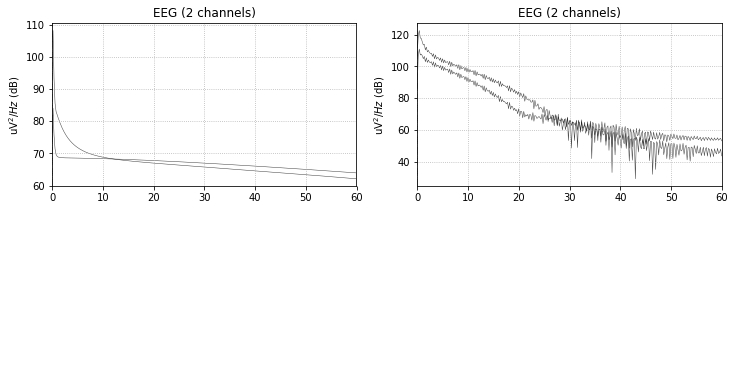

In [425]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,6))

VW_3a.loc[1000:3000].plot(ax=ax[0][0])
VW_3a.plot(x='V', y='W',ax=ax[1][0])#,xlim=[-5,5], ylim=[-5,5])

VW_3b.loc[1000:3000].plot(ax=ax[0][1])
VW_3b.plot(x='V', y='W',ax=ax[1][1])#,xlim=[-5,5], ylim=[-5,5])

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12,3))
_ = mne_3a.plot_psd(ax=ax[0],show=False,fmin=0.,fmax=60.);
_ = mne_3b.plot_psd(ax=ax[1],show=False,fmin=0.,fmax=60.)

Effective window size : 2.048 (s)


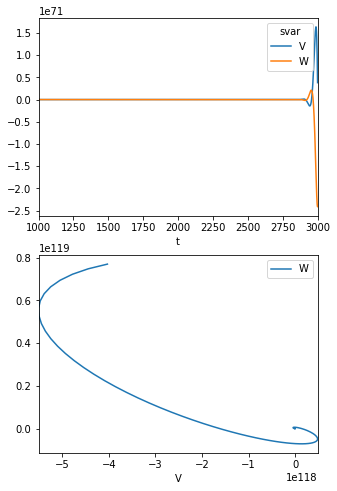

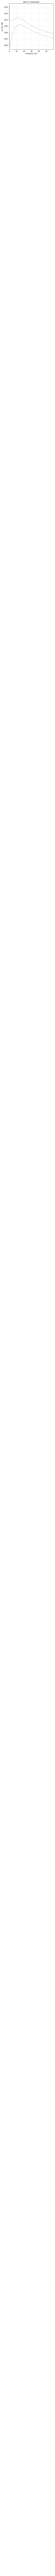

In [429]:
fig, ax = plt.subplots(ncols=1,nrows=2, figsize=(5,8))

VW_4.loc[1000:3000].plot(ax=ax[0])
VW_4.plot(x='V', y='W',ax=ax[1])#,xlim=[-5,5], ylim=[-5,5])

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(5,5))
mne_4.plot_psd(ax=ax,show=False,fmin=0.,fmax=60.);

plt.tight_layout()

Effective window size : 5.005 (s)
Effective window size : 5.005 (s)


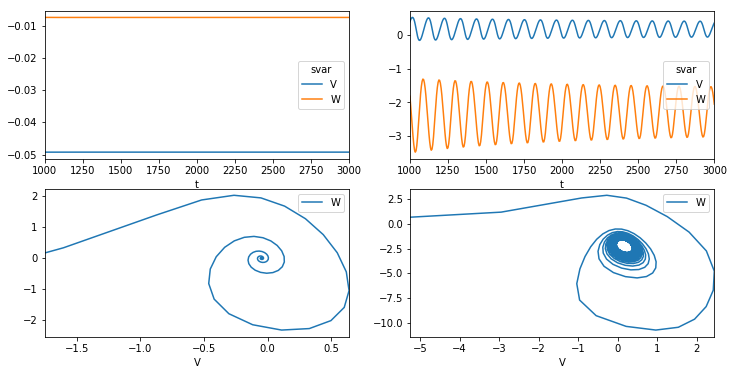

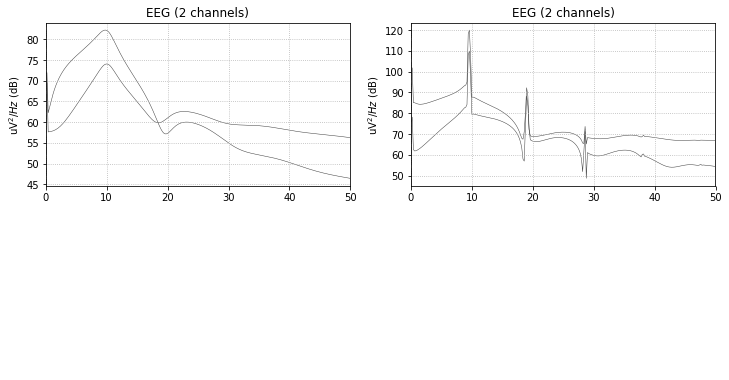

In [423]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,6))

VW_5a.loc[1000:3000].plot(ax=ax[0][0])
VW_5a.plot(x='V', y='W',ax=ax[1][0])#,xlim=[-5,5], ylim=[-5,5])

VW_5b.loc[1000:3000].plot(ax=ax[0][1])
VW_5b.plot(x='V', y='W',ax=ax[1][1])#,xlim=[-5,5], ylim=[-5,5])

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12,3))
_ = mne_5a.plot_psd(ax=ax[0],show=False,fmin=0.,fmax=50.);
_ = mne_5b.plot_psd(ax=ax[1],show=False,fmin=0.,fmax=50.);

Effective window size : 5.005 (s)
Effective window size : 5.005 (s)


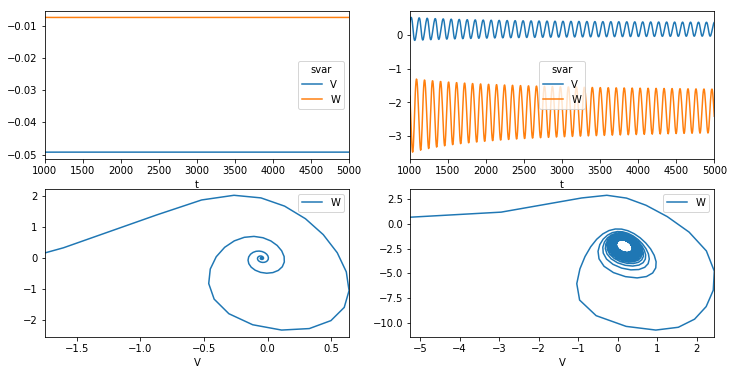

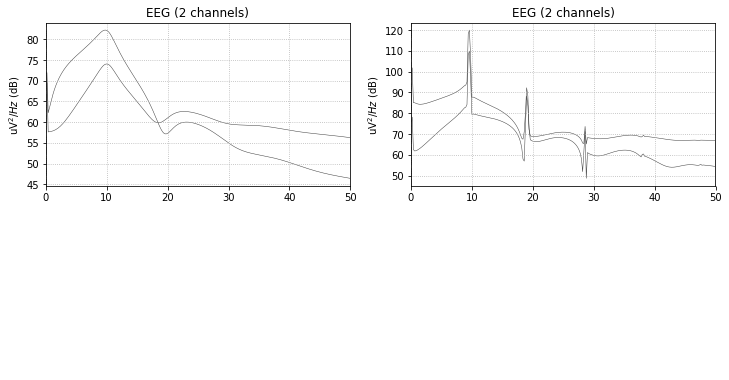

In [433]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,6))

VW_5a.loc[1000:6000].plot(ax=ax[0][0])
VW_5a.plot(x='V', y='W',ax=ax[1][0])#,xlim=[-5,5], ylim=[-5,5])

VW_5b.loc[1000:6000].plot(ax=ax[0][1])
VW_5b.plot(x='V', y='W',ax=ax[1][1])#,xlim=[-5,5], ylim=[-5,5])

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12,3))
_ = mne_5a.plot_psd(ax=ax[0],show=False,fmin=0.,fmax=50.);
_ = mne_5b.plot_psd(ax=ax[1],show=False,fmin=0.,fmax=50.);